In [1]:
import numpy as np
from math import *
import seaborn as sns
import numba

import matplotlib.pyplot as plt

In [12]:
#Functions
def FFI(J:int, v:np.ndarray, a:float, alpha:float, x0:np.ndarray, tau:float = 0.0, scale:float = 1.0, dt:float = 1e-3, max_time:float = 10.0) -> tuple[np.ndarray, int]:
	"""
	J: Number of alternatives
	v: drift rates of all alternatives
	a: threshold parameter
	alpha: strength of feedforward inhibition
	x0: starting points for all alternatives

	tau = 0.0: starting time (non-decision time)
	scale = 1.0: sigma, or scale coefficient
	dt = 1e-3: change in time at each step
	max_time = 1.0: max time for simultation
	"""

	time = tau

	y = x0.tolist()
	y_data = []
	for i in range(J):
		y_data.append([x0[i]])

	while time<max_time:
		for i in range(J):
			#get I
			I = alpha/(J-1) * (sum(y)-y[i])

			z = np.random.normal(loc=0, scale=scale)
			y[i] += (v[i] - I)*dt + scale * np.sqrt(dt)*z
			y[i] = max(y[i], 0)

			y_data[i].append(y[i])

			#update time
			time += dt


		#exit loop if decision boundry met
		if max(y)>=a:
			return np.array(y_data), y.index(max(y))
			
	#return if no decision made
	return np.array(y_data), -1

def FFI_n(N, params, dt = 1e-3, tau=0.0):
	data = np.zeros((N, 2))
	for i in range(N):
		result = FFI(**params)
		data[i,:] = (result[0].shape[1]*dt + tau, result[1])
	return np.array(data)

def show_distributions(sim_data, params):
	# Visualize empirical RT distribution
	f, ax = plt.subplots(1, 1, figsize=(8, 4))
	colors = ['#AA0000', '#00AA00', '#0000AA', '#FFC0CB']
	for j in range(params['v'].shape[0]-1,-1,-1):
		#sns.histplot(sim_data[j], color=colors[j], label=f'Alternative {j}')
		sns.histplot(sim_data[:, 0][sim_data[:, 1] == j], color=colors[j], label=f'Alternative {j}')
	ax.legend()
	sns.despine(ax=ax)
	ax.set_xlabel('Response time (s)', fontsize=16)
	ax.set_ylabel('# of times winning alternative at time')
	ax.set_yticklabels([])
	ax.set_yticks([])
	f.tight_layout()

def show_vizualizations(result):
	"""
	Shows a vizualization of the simulation results

	results: tuple results of FFI() simulation
	"""
	for i in range(result[0].shape[0]):
		plt.plot(result[0][i], label=f'alternative {i}')
	plt.xlabel('Time')
	plt.ylabel('Value')
	plt.title('Value Vs Time for all alternatives')
	plt.legend()
	plt.show()

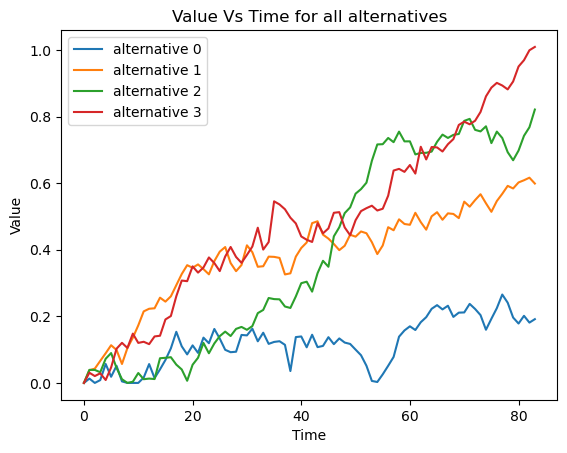

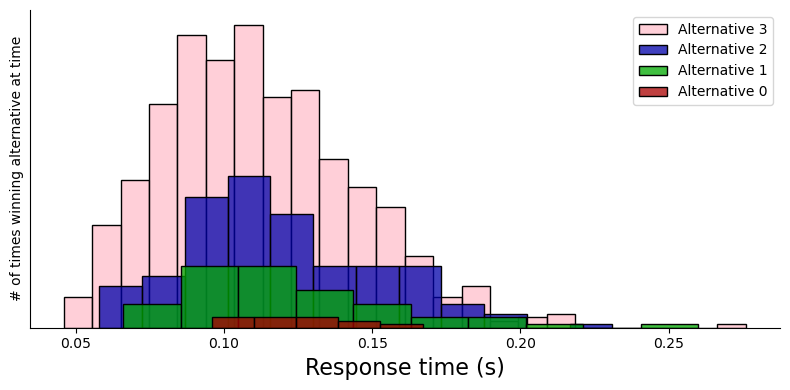

In [13]:
#Plot simulation graphs
params = {
	'J': 4,
	'v' : np.array([1.0, 3.0, 5.0, 8.0]),
	'a' : 1.0,
	'alpha': 0.5,
	'x0' : np.array([0.0, 0.0, 0.0, 0.0]),
}

result = FFI(**params)
show_vizualizations(result)

data = FFI_n(1000, params)
show_distributions(data, params)

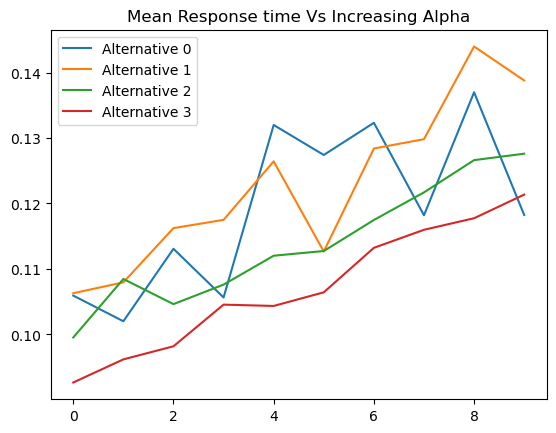

In [4]:
#Plot different values of Alpha
def mean_response(data, params):
	output = np.zeros(params['J'])
	for i in range(params['J']):
		output[i] = np.mean(data[:, 0][data[:, 1] == i])
	return output

means = []
params['alpha'] = alpha = -5.0
for i in range(10):
	data = FFI_n(500, params)
	#show_distributions(data, params)
	means.append(mean_response(data, params))
	params['alpha'] += 1
means = np.array(means)
for i in range(params['J']):
	plt.plot(means[:, i], label = f'Alternative {i}')
plt.title('Mean Response time Vs Increasing Alpha')
plt.legend()
plt.show()